# WordEmbeddings
In this notebook we'll create a word embedding (using Gensim) representation of a corpus of texts in English. Also, we'll visualize the representation using T-SNE

### read data

In [2]:
files = ['sentences_apps.txt', 'sentences_imdb.txt']
corpus = []

for file in files:
    with open('../data/'+file, 'r') as text_file:
        sentences = text_file.readlines()
        for sentence in sentences:
            corpus.append(sentence)

In [3]:
len(corpus)

567239

### pre-process corpus

In [7]:
import re
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_texts(text):
    text = REPLACE_NO_SPACE.sub("", text.lower())
    text = REPLACE_WITH_SPACE.sub(" ", text)
    
    return text.split()

In [8]:
from multiprocessing import Pool
from math import floor

agents = 4
chunksize = floor(len(corpus)/4)
with Pool(processes=agents) as pool:
    processed_corpus = pool.map(preprocess_texts, corpus, chunksize)

In [9]:
print(processed_corpus[0:2])

[['seems', 'to', 'be', 'a', 'bug', 'that', 'i', 'cant', 'get', 'notifications', 'to', 'be', 'silent'], ['i', 'set', 'vibrate', 'to', 'off', 'and', 'it', 'worked', 'at', 'first', 'but', 'then', 'starts', 'vibrating', 'again']]


# Creating Word2Vec
See other parameters at https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec

In [10]:
from gensim.models import Word2Vec
w2vmodel = Word2Vec(sentences=processed_corpus,
                    size=500,
                    min_count=5,
                    workers=4)

In [20]:
w2vmodel.wv.most_similar(positive=['good'], negative=['bad'])

[('fine', 0.3778226673603058),
 ('decent', 0.3380492627620697),
 ('solid', 0.3289002478122711),
 ('nice', 0.3207089304924011),
 ('great', 0.3023111820220947),
 ('genuine', 0.3017728924751282),
 ('terrific', 0.28680741786956787),
 ('strong', 0.2833295464515686),
 ('excellent', 0.2818334102630615),
 ('fresh', 0.27687108516693115)]

In [14]:
w2vmodel.save('word2vec_IMDb_GooglePlay.w2v')

# Visualizing 

In [21]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline  

### get infos from w2v model

In [22]:
vocab = list(w2vmodel.wv.vocab)
X = w2vmodel[vocab]

/home/professor/.virtualenvs/GrupoEstudos_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


### project n-dimensional into 2-dimensional space using T-SNE

In [23]:
tsne = TSNE(n_components=2, verbose=1, n_iter=1000)
X_tsne = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 42272 samples in 1.785s...
[t-SNE] Computed neighbors for 42272 samples in 1424.939s...
[t-SNE] Computed conditional probabilities for sample 1000 / 42272
[t-SNE] Computed conditional probabilities for sample 2000 / 42272
[t-SNE] Computed conditional probabilities for sample 3000 / 42272
[t-SNE] Computed conditional probabilities for sample 4000 / 42272
[t-SNE] Computed conditional probabilities for sample 5000 / 42272
[t-SNE] Computed conditional probabilities for sample 6000 / 42272
[t-SNE] Computed conditional probabilities for sample 7000 / 42272
[t-SNE] Computed conditional probabilities for sample 8000 / 42272
[t-SNE] Computed conditional probabilities for sample 9000 / 42272
[t-SNE] Computed conditional probabilities for sample 10000 / 42272
[t-SNE] Computed conditional probabilities for sample 11000 / 42272
[t-SNE] Computed conditional probabilities for sample 12000 / 42272
[t-SNE] Computed conditional probabilities for 

### create a dataframe and plot

In [24]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

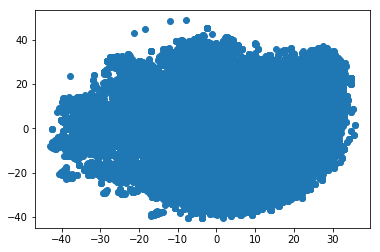

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

In [26]:
for word, pos in df.iterrows():
    ax.annotate(word, pos)